In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('insurance.csv')
df=data.copy()

# Understand the Data:

In [3]:
# Data Review
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
430,19,male,33.100,0,no,southwest,23082.95533
956,54,male,30.800,1,yes,southeast,41999.52000
1060,24,male,32.010,0,no,southeast,1981.58190
748,47,female,36.000,1,no,southwest,8556.90700
1192,58,female,32.395,1,no,northeast,13019.16105


In [4]:
# Data size
df.shape

(1338, 7)

In [5]:
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Missing Values:
df.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [7]:
# statistical overview
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# Duplicate Data
df.duplicated().sum()

1

In [10]:
df = df.drop_duplicates()

In [11]:
# Correlation Analysis
encoded_df=pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True,dtype=int)
df1=encoded_df.copy()

In [12]:
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [13]:
df1.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,-0.038695,0.073578,-0.043637
sex_male,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


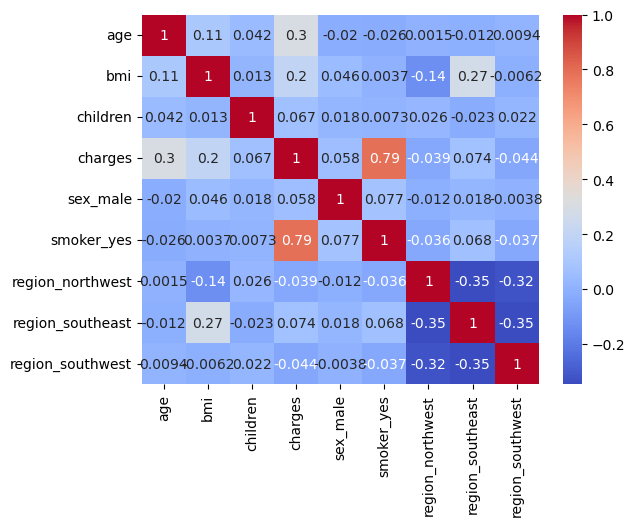

In [14]:
corr_viz=sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

In [15]:
# Skewness
df1.skew()

age                 0.054781
bmi                 0.283914
children            0.937421
charges             1.515391
sex_male           -0.019469
smoker_yes          1.463601
region_northwest    1.204009
region_southeast    1.024467
region_southwest    1.199258
dtype: float64

In [16]:
# Standardize the Data:
from sklearn.preprocessing import StandardScaler
# Separate numerical and categorical columns
numerical_cols = ['age', 'bmi','children','charges']
categorical_cols = ['sex','smoker','region']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the numerical columns
standardized_numerical_data = scaler.fit_transform(df[numerical_cols])

# Convert back to a DataFrame
standardized_numerical_df = pd.DataFrame(standardized_numerical_data, columns=numerical_cols)

# Combine standardized numerical data with categorical data
df2 = pd.concat([standardized_numerical_df, data[categorical_cols].reset_index(drop=True)], axis=1)

# df2.head()


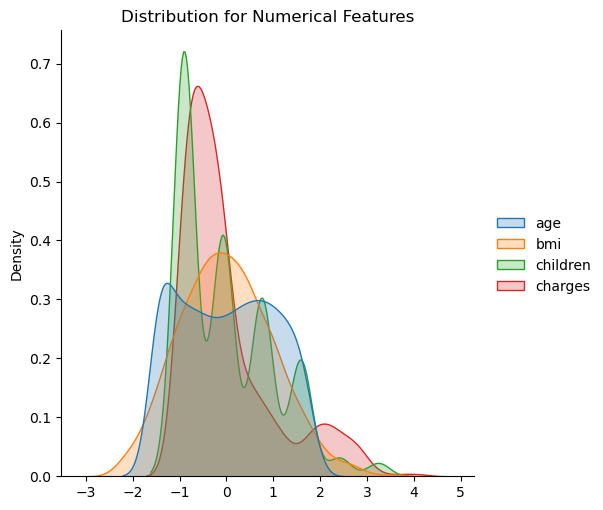

In [17]:
#Distribution for Numerical Features: 
sns.displot(data=df2, kind="kde", fill=True, common_norm=False)
plt.title("Distribution for Numerical Features")
plt.show()

### ***Univariate Graphical Analysis***

#### 1-Categorical Data

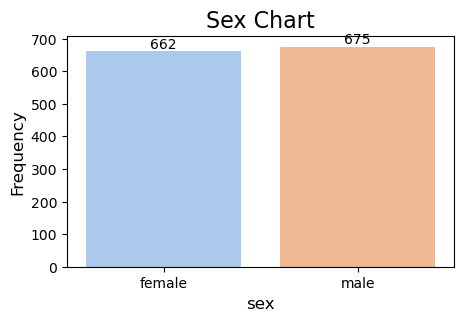

In [18]:
# Sex:

# Create the countplot
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='sex', data=df, palette='pastel')

# Add annotations for counts
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  # Center the annotation
    y = p.get_height()
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom', fontsize=10)

plt.title("Sex Chart", fontsize=16)
plt.xlabel("sex", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

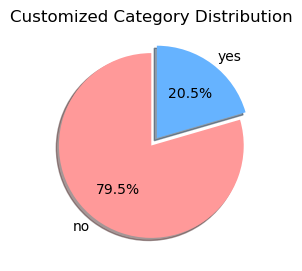

In [19]:
# Smoker:

# Get category counts
category_counts = df['smoker'].value_counts()

# Customize pie chart
explode = [0.1 if cat == 'yes' else 0 for cat in category_counts.index]  # Explode 'yes'

plt.figure(figsize=(5, 3))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff', '#99ff99'],
    explode=explode,
    shadow=True
)
plt.title("Customized Category Distribution")
plt.show()


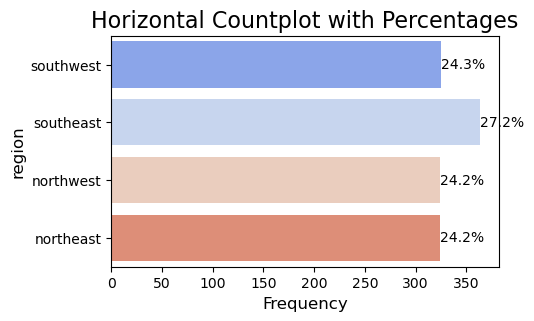

In [20]:
# Regions:

# Create the horizontal countplot
plt.figure(figsize=(5, 3))
ax = sns.countplot(y='region', data=df, palette='coolwarm')

total = len(df)

# Add percentage annotations
for p in ax.patches:
    percentage = 100 * p.get_width() / total  # Calculate the percentage
    y_position = p.get_y() + p.get_height() / 2
    ax.annotate(f'{percentage:.1f}%', (p.get_width(), y_position), ha='left', va='center', fontsize=10)

plt.title("Horizontal Countplot with Percentages", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("region", fontsize=12)
plt.show()

#### 2-Numerical Data

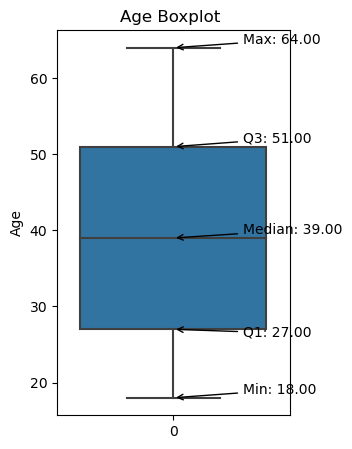

In [21]:
# Age: Show Summary Statistics and Identify Outliers

# Create a boxplot
plt.figure(figsize=(3, 5))
sns.boxplot(data=df['age'])

# Calculate boxplot statistics
stats = {
    "Median": np.median(df['age']),
    "Q1": np.percentile(df['age'], 25),
    "Q3": np.percentile(df['age'], 75),
    "Min": np.min(df['age']),
    "Max": np.max(df['age'])
}

# Annotate the plot
plt.annotate(f"Median: {stats['Median']:.2f}", xy=(0, stats['Median']), xytext=(0.3, stats['Median'] + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10)
plt.annotate(f"Q1: {stats['Q1']:.2f}", xy=(0, stats['Q1']), xytext=(0.3, stats['Q1'] - 1),
             arrowprops=dict(facecolor='blue', arrowstyle="->"), fontsize=10)
plt.annotate(f"Q3: {stats['Q3']:.2f}", xy=(0, stats['Q3']), xytext=(0.3, stats['Q3'] + 0.5),
             arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=10)
plt.annotate(f"Min: {stats['Min']:.2f}", xy=(0, stats['Min']), xytext=(0.3, stats['Min'] + 0.5),
             arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=10)
plt.annotate(f"Max: {stats['Max']:.2f}", xy=(0, stats['Max']), xytext=(0.3, stats['Max'] + 0.5),
             arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=10)
# Add title and labels
plt.title("Age Boxplot ")
plt.ylabel("Age")
plt.show()


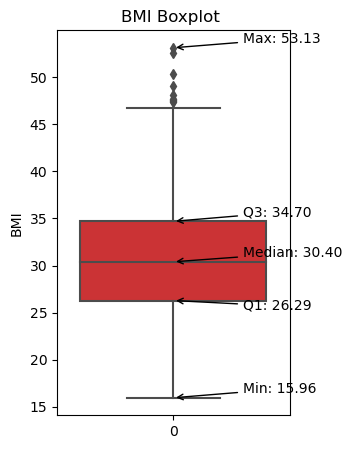

In [22]:
# BMI: Show Summary Statistics and Identify Outliers

# Create a boxplot
plt.figure(figsize=(3, 5))
sns.boxplot(data=df['bmi'],palette='Set1')

# Calculate boxplot statistics
stats = {
    "Median": np.median(df['bmi']),
    "Q1": np.percentile(df['bmi'], 25),
    "Q3": np.percentile(df['bmi'], 75),
    "Min": np.min(df['bmi']),
    "Max": np.max(df['bmi'])
}

# Annotate the plot
plt.annotate(f"Median: {stats['Median']:.2f}", xy=(0, stats['Median']), xytext=(0.3, stats['Median'] + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10)
plt.annotate(f"Q1: {stats['Q1']:.2f}", xy=(0, stats['Q1']), xytext=(0.3, stats['Q1'] - 1),
             arrowprops=dict(facecolor='blue', arrowstyle="->"), fontsize=10)
plt.annotate(f"Q3: {stats['Q3']:.2f}", xy=(0, stats['Q3']), xytext=(0.3, stats['Q3'] + 0.5),
             arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=10)
plt.annotate(f"Min: {stats['Min']:.2f}", xy=(0, stats['Min']), xytext=(0.3, stats['Min'] + 0.5),
             arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=10)
plt.annotate(f"Max: {stats['Max']:.2f}", xy=(0, stats['Max']), xytext=(0.3, stats['Max'] + 0.5),
             arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=10)
# Add title and labels
plt.title("BMI Boxplot ")
plt.ylabel("BMI")
plt.show()


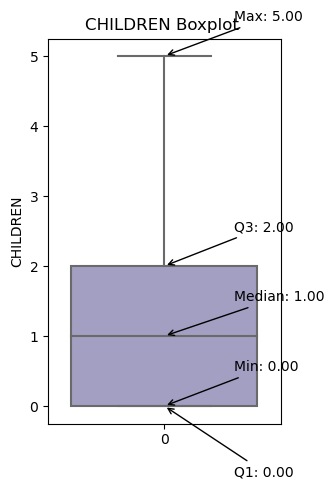

In [23]:
# CHILDREN: Show Summary Statistics and Identify Outliers

# Create a boxplot
plt.figure(figsize=(3, 5))
sns.boxplot(data=df['children'],palette='Purples')

# Calculate boxplot statistics
stats = {
    "Median": np.median(df['children']),
    "Q1": np.percentile(df['children'], 25),
    "Q3": np.percentile(df['children'], 75),
    "Min": np.min(df['children']),
    "Max": np.max(df['children'])
}

# Annotate the plot
plt.annotate(f"Median: {stats['Median']:.2f}", xy=(0, stats['Median']), xytext=(0.3, stats['Median'] + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10)
plt.annotate(f"Q1: {stats['Q1']:.2f}", xy=(0, stats['Q1']), xytext=(0.3, stats['Q1'] - 1),
             arrowprops=dict(facecolor='blue', arrowstyle="->"), fontsize=10)
plt.annotate(f"Q3: {stats['Q3']:.2f}", xy=(0, stats['Q3']), xytext=(0.3, stats['Q3'] + 0.5),
             arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=10)
plt.annotate(f"Min: {stats['Min']:.2f}", xy=(0, stats['Min']), xytext=(0.3, stats['Min'] + 0.5),
             arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=10)
plt.annotate(f"Max: {stats['Max']:.2f}", xy=(0, stats['Max']), xytext=(0.3, stats['Max'] + 0.5),
             arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=10)
# Add title and labels
plt.title("CHILDREN Boxplot ")
plt.ylabel("CHILDREN")
plt.show()


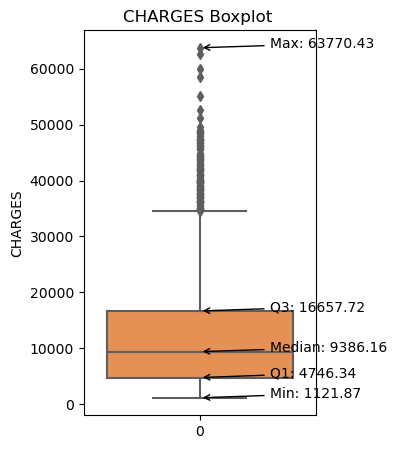

In [24]:
# CHARGES: Show Summary Statistics and Identify Outliers

# Create a boxplot
plt.figure(figsize=(3, 5))
sns.boxplot(data=df['charges'],palette='Oranges')

# Calculate boxplot statistics
stats = {
    "Median": np.median(df['charges']),
    "Q1": np.percentile(df['charges'], 25),
    "Q3": np.percentile(df['charges'], 75),
    "Min": np.min(df['charges']),
    "Max": np.max(df['charges'])
}

# Annotate the plot
plt.annotate(f"Median: {stats['Median']:.2f}", xy=(0, stats['Median']), xytext=(0.3, stats['Median'] + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10)
plt.annotate(f"Q1: {stats['Q1']:.2f}", xy=(0, stats['Q1']), xytext=(0.3, stats['Q1'] - 1),
             arrowprops=dict(facecolor='blue', arrowstyle="->"), fontsize=10)
plt.annotate(f"Q3: {stats['Q3']:.2f}", xy=(0, stats['Q3']), xytext=(0.3, stats['Q3'] + 0.5),
             arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=10)
plt.annotate(f"Min: {stats['Min']:.2f}", xy=(0, stats['Min']), xytext=(0.3, stats['Min'] + 0.5),
             arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=10)
plt.annotate(f"Max: {stats['Max']:.2f}", xy=(0, stats['Max']), xytext=(0.3, stats['Max'] + 0.5),
             arrowprops=dict(facecolor='green', arrowstyle="->"), fontsize=10)
# Add title and labels
plt.title("CHARGES Boxplot ")
plt.ylabel("CHARGES")
plt.show()


In [25]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


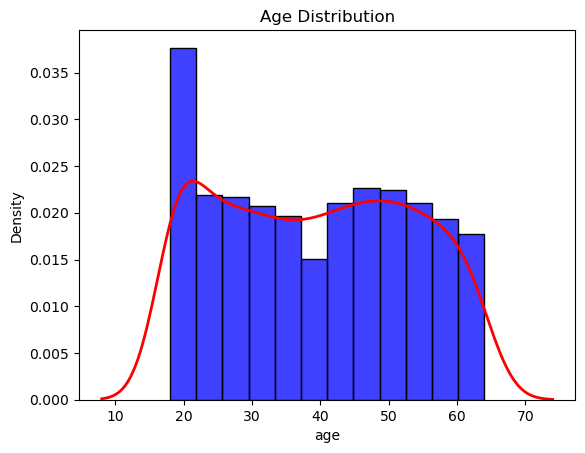

In [26]:
sns.histplot(df['age'], kde=False, color='blue',stat="density",)
# Overlay KDE with custom color
sns.kdeplot(df['age'], color='red', linewidth=2)

plt.title("Age Distribution")
plt.show()

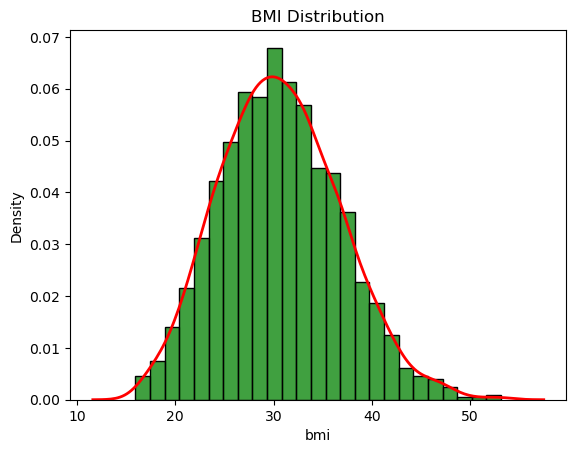

In [27]:
sns.histplot(df['bmi'], kde=False, color='green',stat="density",)
# Overlay KDE with custom color
sns.kdeplot(df['bmi'], color='red', linewidth=2)

plt.title("BMI Distribution")
plt.show()

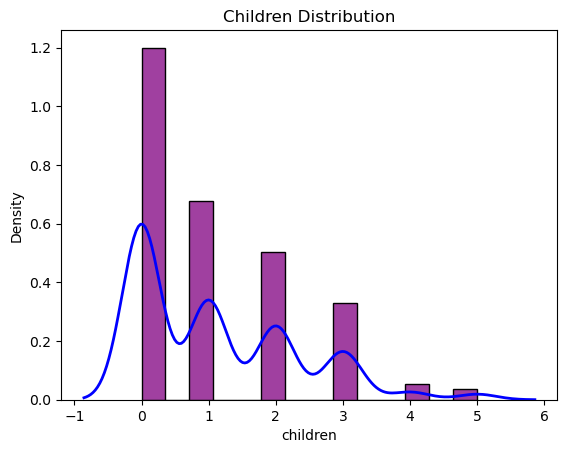

In [28]:
sns.histplot(df['children'], kde=False, color='purple',stat="density",)
# Overlay KDE with custom color
sns.kdeplot(df['children'], color='blue', linewidth=2)

plt.title("Children Distribution")
plt.show()

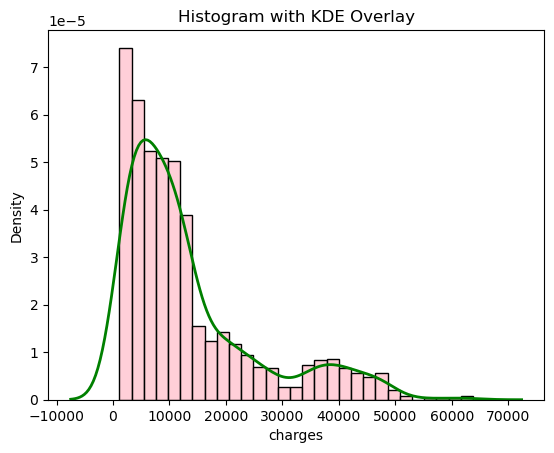

In [29]:
sns.histplot(df['charges'], kde=False, color='pink',stat="density",)
# Overlay KDE with custom color
sns.kdeplot(df['charges'], color='green', linewidth=2)

plt.title("Histogram with KDE Overlay")
plt.show()

### Bi/Multivariate Graphical Analysis

#### Visualizing (Numerical-Numerical) Features:

In [30]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


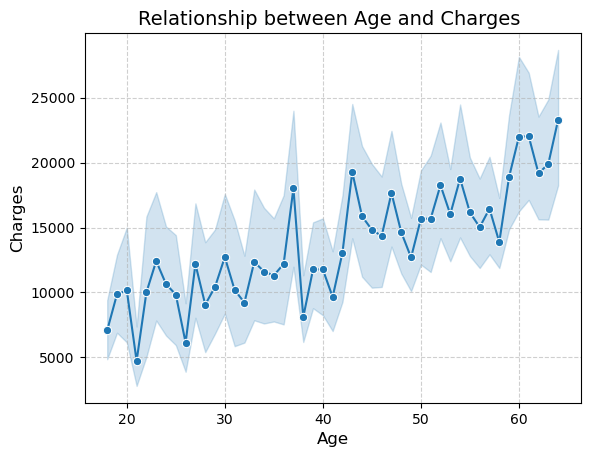

In [31]:
# Relationship between Age and Charges :

sns.lineplot(data=data, x=df['age'], y=df['charges'],  marker='o')
plt.title("Relationship between Age and Charges ", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Charges", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

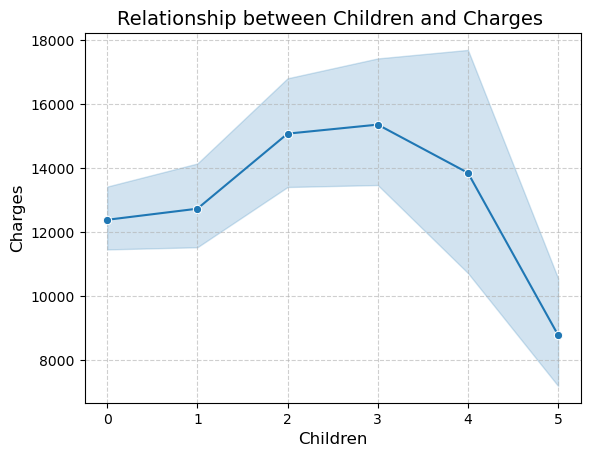

In [32]:
# Relationship between Children and Charges grouping by smoker:

sns.lineplot(data=df, x=df['children'], y=df['charges'],  marker='o')
plt.title("Relationship between Children and Charges ", fontsize=14)
plt.xlabel("Children", fontsize=12)
plt.ylabel("Charges", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


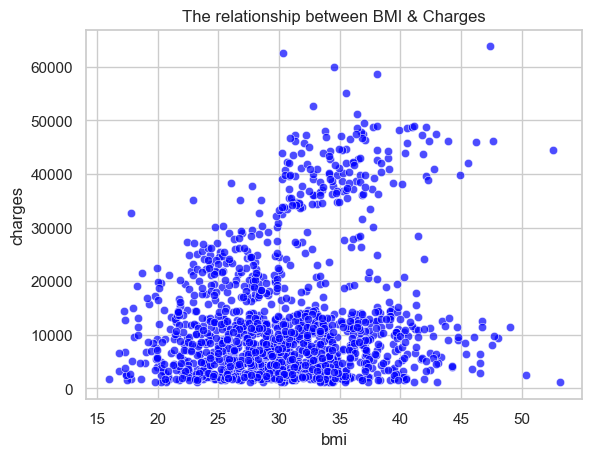

In [33]:
# The relationship between BMI & Charges:
sns.set(style="whitegrid")
sns.scatterplot(data=df, x=df['bmi'], y=df['charges'], color='blue', alpha=0.7)
plt.title("The relationship between BMI & Charges")
plt.show()

#### Visualizing (Numerical-Categorical) Features:

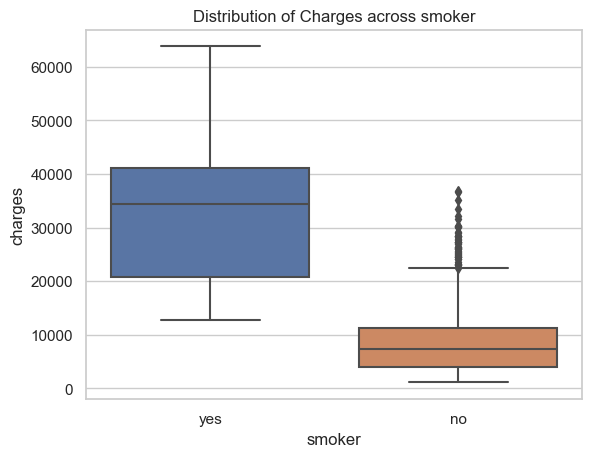

In [34]:
sns.boxplot(data=df,x=df['smoker'],y=df ['charges'])
plt.title('Distribution of Charges across smoker')
plt.show()

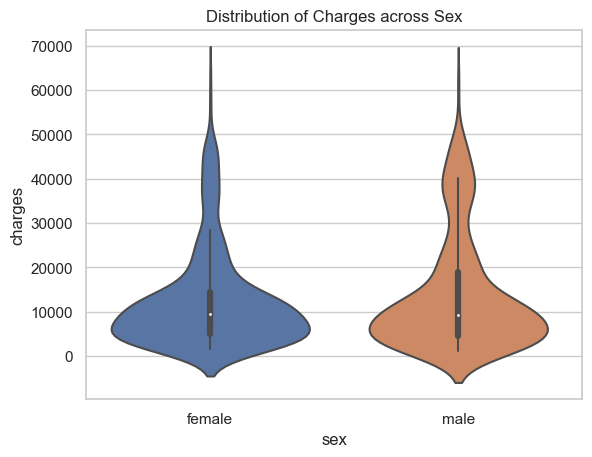

In [35]:
# Distribution of Charges across Sex:
sns.violinplot(x= df['sex'],y=df['charges'],data=df,palette='deep')
plt.title("Distribution of Charges across Sex")
plt.show()

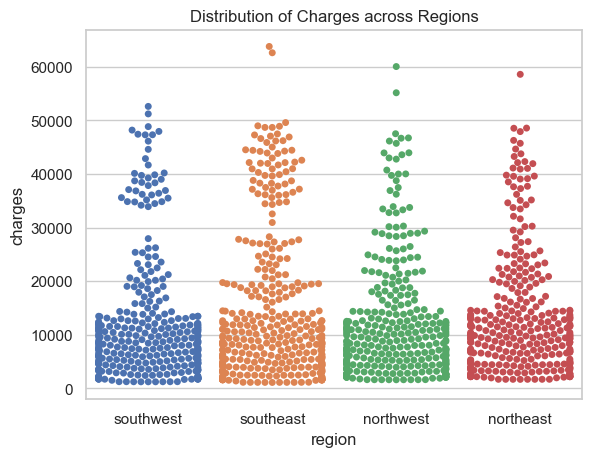

In [36]:
# Distribution of Charges across Regions:
sns.swarmplot(x=df['region'],y=df['charges'],data=df,palette='deep')
plt.title('Distribution of Charges across Regions')
plt.show()

#### Visualizing (Categorical-Categorical) Features:

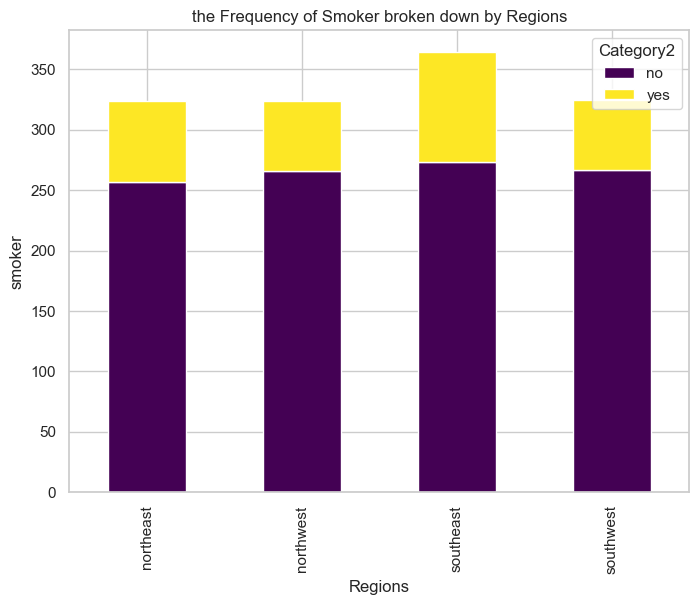

In [37]:
# the Frequency of Smoker broken down by Sex
ct = pd.crosstab(df['region'], df['smoker'])

# Plot
ct.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('the Frequency of Smoker broken down by Regions')
plt.xlabel('Regions')
plt.ylabel('smoker')
plt.legend(title='Category2')
plt.show()

In [38]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


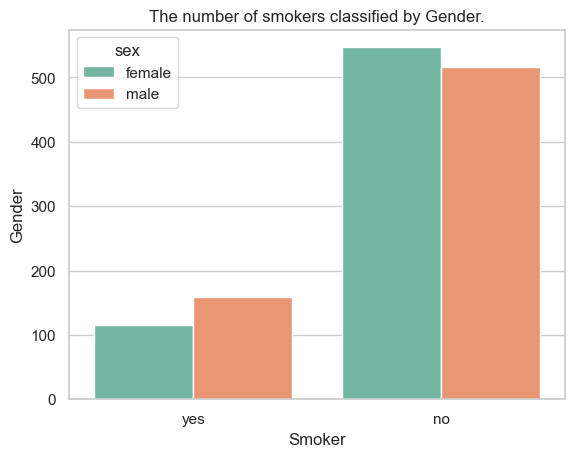

In [39]:
# The number of smokers classified by Gender:
sns.countplot(data=df, x=df['smoker'], hue=df['sex'], palette='Set2')
plt.title('The number of smokers classified by Gender.')
plt.xlabel('Smoker')
plt.ylabel('Gender')
plt.show()


# Build a Machine Learning Model:

In [40]:
df1.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0


In [41]:
X=df1.drop('charges',axis=1)
y=df1['charges']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
model=RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [64]:
model.score(X_test,y_test)

0.8821526409014464

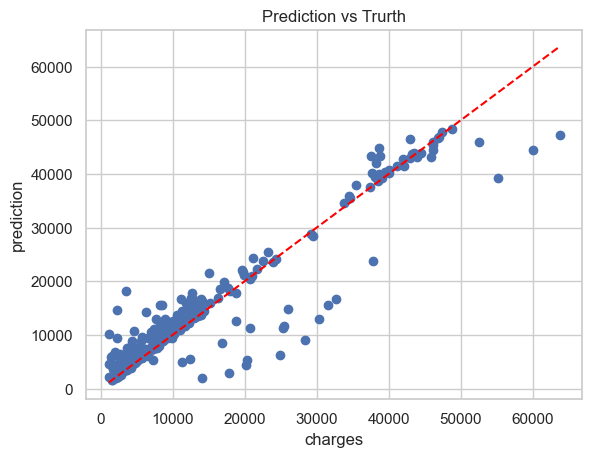

In [65]:
y_pred=model.predict(X_test)
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',ls='--')
plt.xlabel('charges')
plt.ylabel('prediction')
plt.title('Prediction vs Trurth')
plt.show()

## Feature importance:

In [50]:

feature_importance=sorted(zip(model.feature_names_in_,model.feature_importances_),
                          key=lambda x:x[1],
                          reverse=True)

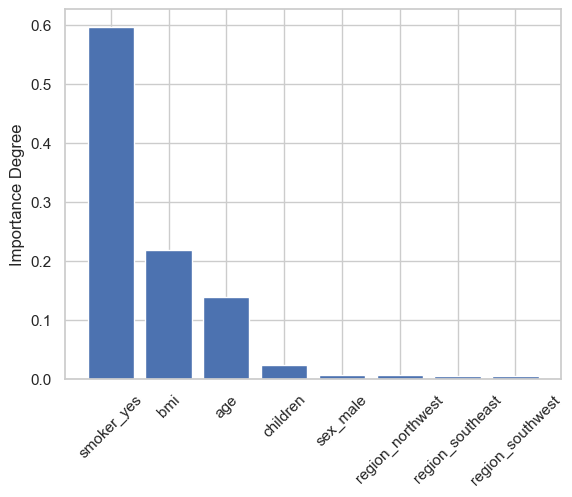

In [51]:
plt.bar([x[0] for x in feature_importance],[x[1] for x in feature_importance])
plt.xticks(rotation=45)
plt.ylabel('Importance Degree')
plt.show()

## Hyperparametre tunning:

In [52]:
pram_grid={
    'max_depth': [None,2,5],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf':[1,2,4,6]
}
model=RandomForestRegressor(n_jobs=-1,random_state=42)
grid_search=GridSearchCV(model,param_grid=pram_grid,cv=5)

In [53]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8]})

In [54]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [55]:
model1=grid_search.best_estimator_
model1

RandomForestRegressor(max_depth=5, min_samples_leaf=6, n_jobs=-1,
                      random_state=42)

In [56]:
model1.score(X_test,y_test)

0.9038362446413967

In [57]:
y_pred1=model1.predict(X_test)
mae1=mean_absolute_error(y_test,y_pred1)
mae1

2371.1082530313906

In [68]:
median_charges=y_test.median()
median_charges

9535.6506

In [67]:
std_charges=y_test.std()
std_charges

13581.026802125632

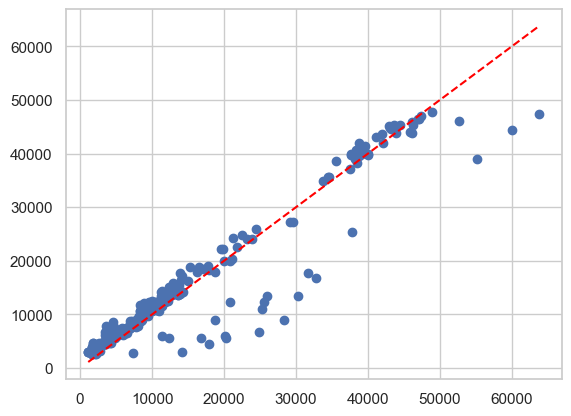

In [61]:
plt.scatter(y_test,y_pred1)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',ls='--')
plt.show()

## Overall Analysis:



**Performance Observations**:

+ The MAE indicates that the model's overall performance is relatively consistent on average.

+ However, the median error being so much larger than the MAE indicates a skewed error distribution, where a few very large errors (outliers) are affecting the results.

+ The large standard deviation confirms this, showing a high spread in prediction errors.

**Possible Causes**:

+ The model might struggle with certain subsets of the data (e.g., high variance in the target variable or extreme values).
+ The dataset could contain noise or poorly handled outliers.
+ Model capacity might not be sufficient to capture the complexity of the data.

***Key Takeaway***

+ The model's predictions are fairly good on average (MAE), but the high median error and standard deviation highlight significant outliers or variability. Addressing these issues could improve both interpretability and performance.